In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
application_data = "application_record.csv"
credit_data = "credit_record.csv"
app_df = pd.read_csv(application_data)
cre_df = pd.read_csv(credit_data)
print(app_df['ID'].nunique())
print(app_df.shape)
print(cre_df['ID'].nunique())

438510
(438557, 18)
45985


In [3]:
# Data cleaning 1: check 1. application dataset: unique ID; 2. credit dataset: unique ID;
app_group = app_df.groupby('ID').count()
app_dup_list = app_group[app_group['CODE_GENDER']>1].index
app_dup = app_df[app_df['ID'].isin(app_dup_list)].sort_values(by='ID')
print(app_dup['ID'].nunique())
display(app_dup) # we can see that 47 IDs correspond to multiple people
app_df = app_df.drop_duplicates(subset=['ID'], keep='last')
print(app_df['ID'].nunique())
print(app_df.shape)

47


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


438510
(438510, 18)


In [4]:
# Data cleaning 2: drop column
app_df = app_df.drop(['FLAG_PHONE','FLAG_EMAIL','FLAG_MOBIL','FLAG_WORK_PHONE'], axis=1) 
app_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,NaN,2.0


In [5]:
# Data prepocessing 3: categorical
def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot

categories = {'NAME_INCOME_TYPE':['State servant', 'Working', 'Commercial associate', 'Student','Pensioner'],
              'NAME_EDUCATION_TYPE':['Secondary / secondary special', 'Higher education',
                                     'Incomplete higher', 'Lower secondary', 'Academic degree'],
              'NAME_FAMILY_STATUS':['Single / not married', 'Civil marriage', 'Married', 'Separated','Widow'],
              'NAME_HOUSING_TYPE':['With parents', 'House / apartment', 'Municipal apartment',
                                   'Co-op apartment', 'Rented apartment', 'Office apartment'],
              'OCCUPATION_TYPE':['Core staff', 'Laborers', 'Managers', 'Drivers',
                                   'Private service staff', 'High skill tech staff',
                                   'Waiters/barmen staff', 'Sales staff', 'Accountants',
                                   'Security staff', 'Medicine staff', 'Cooking staff', 'IT staff',
                                   'Cleaning staff', 'Low-skill Laborers', 'HR staff', 'Secretaries',
                                     'Realty agents']}
app = app_df.copy()
for key, value in categories.items():
    for i in range(len(value)):
        new_column = value[i]
        app[new_column] = one_hot_encoder(app[key])[:,i]
app = app.drop(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'],axis=1)
app['CODE_GENDER'] = np.where(app['CODE_GENDER']=='M',1,0)
app['FLAG_OWN_CAR'] = np.where(app['FLAG_OWN_CAR']=='Y',1,0)
app['FLAG_OWN_REALTY'] = np.where(app['FLAG_OWN_REALTY']=='Y',1,0)
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,State servant,...,Accountants,Security staff,Medicine staff,Cooking staff,IT staff,Cleaning staff,Low-skill Laborers,HR staff,Secretaries,Realty agents
0,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5008805,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5008806,1,1,1,0,112500.0,-21474,-1134,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5008808,0,0,1,0,270000.0,-19110,-3051,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5008809,0,0,1,0,270000.0,-19110,-3051,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,0,135000.0,-22717,365243,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438553,6840222,0,0,0,0,103500.0,-15939,-3007,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
438554,6841878,0,0,0,0,54000.0,-8169,-372,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
438555,6842765,0,0,1,0,72000.0,-21673,365243,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Data prepocessing 4: intersection
app.set_index("ID")
joint_df = pd.merge(app,cre_df, on="ID", how = 'inner')
print(joint_df['ID'].nunique())
joint_df

36457


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,State servant,...,Medicine staff,Cooking staff,IT staff,Cleaning staff,Low-skill Laborers,HR staff,Secretaries,Realty agents,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,C
1,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,C
2,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2,C
3,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3,C
4,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,-9188,-1193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9,0
777711,5150337,1,0,1,0,112500.0,-9188,-1193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10,2
777712,5150337,1,0,1,0,112500.0,-9188,-1193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11,1
777713,5150337,1,0,1,0,112500.0,-9188,-1193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12,0


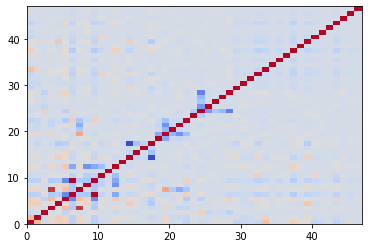

In [7]:
# we want to check the correlatoins within different demographic attributes to avoid multicolinearity problem
demo_df = joint_df.drop(columns = ['ID', 'MONTHS_BALANCE', 'STATUS'])
X = pd.get_dummies(demo_df, )
# shows the effor on trying to check the multicollinearity between independent variables
import matplotlib.pyplot as plot
plot.pcolor(X.corr(),cmap='coolwarm')
plot.show()



<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='counts'>

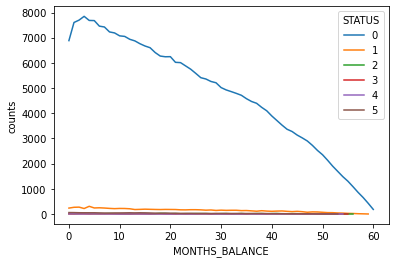

In [8]:
bad_month = joint_df.groupby(['MONTHS_BALANCE', 'STATUS']).size().reset_index(name='counts')
bad_month.drop(bad_month[bad_month.STATUS.isin(["X","C"])].index,inplace=True)
bad_month['MONTHS_BALANCE'] =  abs(bad_month['MONTHS_BALANCE'])
sns.lineplot(data=bad_month, x='MONTHS_BALANCE', y='counts', hue='STATUS')


<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='counts'>

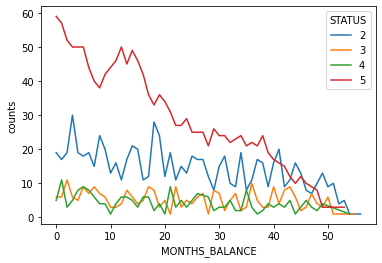

In [9]:
sns.lineplot(data=bad_month[(bad_month.STATUS != '0') & (bad_month.STATUS != '1')], x='MONTHS_BALANCE', y='counts', hue='STATUS')

In [10]:
def calculate_score_2(df):
    import numpy as np
    mydict = {1: 1, 2: 1.5, 3: 2, 4: 2.5, 5: 3, 6: 3.5}
    score = 0
    l = df['UPDATED_STATUS'].to_numpy()
    og_list = df['STATUS'].to_numpy()
    margin = np.diff(l)
    for idx, ele in enumerate(margin):
        if ele == 1:
            score -= mydict[l[idx+1]] * l[idx+1]
    score += np.sum((margin[margin<0] + 1) **2)
    score += len(og_list[og_list=='C']) * 2
    return score

In [11]:
def assign_credit_score(og_df):
    # copy df to make sure we don't mess up the original data
    df = og_df.copy()
    df['UPDATED_STATUS'] = df['STATUS'].apply(lambda x: int(x) if x.isnumeric() else -1) + 1
    # this following line of code is used when we want x to be -2, and c to be -1
#     df['STATUS'] = df['STATUS'].apply(lambda x: int(x) if x.isnumeric() else (-1 if x=='C' else -2)) + 1
    og_df['UPDATED_STATUS'] = df['UPDATED_STATUS']
    # get a list for each unique id. Append the list into a dictionary(key = ID, value = list)
    id_list = df['ID'].unique()
    mydict = dict()
    for _id in id_list:
        score = calculate_score_2(df[df['ID'] == _id][['STATUS', 'UPDATED_STATUS']])
        mydict[_id] = score
    return mydict

In [12]:
# find ID's whose record contains a jump in status (0, 2) which indicates incorrect data
def find_incorrect_data(og_df):
    df = og_df.copy()
    id_list = df['ID'].unique()
    mydict = dict()
    removelist = list()
    for _id in id_list:
        margin = np.diff(df[df['ID'] == _id]['UPDATED_STATUS'].to_numpy())
        if margin[margin<-1].size > 0:
            # this is the case where there is an increase larger than 1 between consecutive months
            # remove this ID from original df
            removelist.append(_id)
    return removelist

In [13]:
mydict = assign_credit_score(joint_df)
joint_df['Score'] = joint_df['ID'].apply(lambda x: mydict[x])

<h4>Remove occurence of incorrect data</h4>

In [14]:
removelist = find_incorrect_data(joint_df)

In [15]:
joint_df['drop'] = joint_df['ID'].apply(lambda x: 1 if x in removelist else 0)

In [16]:
joint_df = joint_df[joint_df['drop']==0]
print(joint_df['ID'].nunique())
joint_df

35979


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,State servant,...,Cleaning staff,Low-skill Laborers,HR staff,Secretaries,Realty agents,MONTHS_BALANCE,STATUS,UPDATED_STATUS,Score,drop
0,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,C,0,26.0,0
1,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1,C,0,26.0,0
2,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2,C,0,26.0,0
3,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-3,C,0,26.0,0
4,5008804,1,1,1,0,427500.0,-12005,-4542,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-4,C,0,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,-9188,-1193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-9,0,1,0.0,0
777711,5150337,1,0,1,0,112500.0,-9188,-1193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-10,2,3,0.0,0
777712,5150337,1,0,1,0,112500.0,-9188,-1193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-11,1,2,0.0,0
777713,5150337,1,0,1,0,112500.0,-9188,-1193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-12,0,1,0.0,0


In [17]:
joint_df.shape

(763884, 53)

In [18]:
joint_df['ID'].nunique()

35979

<h4>Remove Outliers</h4>

In [19]:
q_hi = joint_df['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = joint_df['AMT_INCOME_TOTAL'].quantile(0.001)
joint_df= joint_df[(joint_df['AMT_INCOME_TOTAL']>q_low) & (joint_df['AMT_INCOME_TOTAL']<q_hi)]
q_hi = joint_df['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = joint_df['CNT_FAM_MEMBERS'].quantile(0.001)
joint_df= joint_df[(joint_df['CNT_FAM_MEMBERS']>q_low) & (joint_df['CNT_FAM_MEMBERS']<q_hi)]

In [20]:
joint_df['ID'].nunique()

28901

In [21]:
joint_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'State servant', 'Working', 'Commercial associate', 'Student',
       'Pensioner', 'Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree',
       'Single / not married', 'Civil marriage', 'Married', 'Separated',
       'Widow', 'With parents', 'House / apartment', 'Municipal apartment',
       'Co-op apartment', 'Rented apartment', 'Office apartment', 'Core staff',
       'Laborers', 'Managers', 'Drivers', 'Private service staff',
       'High skill tech staff', 'Waiters/barmen staff', 'Sales staff',
       'Accountants', 'Security staff', 'Medicine staff', 'Cooking staff',
       'IT staff', 'Cleaning staff', 'Low-skill Laborers', 'HR staff',
       'Secretaries', 'Realty agents', 'MONTHS_BALANCE', 'STATUS',
       'UPDATED_STATUS', 'Score', 'drop'],
      dtype=

Drop irrelavent columns

In [22]:
# df_corr.info()
df_corr = X.corr(method = 'pearson')

high_corr = []
for (columnName, columnData) in df_corr.iteritems():
    for values in columnData.values:
        if abs(values) > 0.6 and abs(values) != 1:
            pop = df_corr.loc[df_corr[columnName] == values]
#             print(pop.index)
            high_corr.append((columnName, values, pop.index))
high_corr


[('CNT_CHILDREN',
  0.8920785793930357,
  Index(['CNT_FAM_MEMBERS'], dtype='object')),
 ('DAYS_BIRTH', -0.6088559308814753, Index(['DAYS_EMPLOYED'], dtype='object')),
 ('DAYS_BIRTH', -0.6118821058889896, Index(['Working'], dtype='object')),
 ('DAYS_EMPLOYED', -0.6088559308814753, Index(['DAYS_BIRTH'], dtype='object')),
 ('DAYS_EMPLOYED', 0.9979146040336608, Index(['Working'], dtype='object')),
 ('CNT_FAM_MEMBERS',
  0.8920785793930357,
  Index(['CNT_CHILDREN'], dtype='object')),
 ('Working', -0.6118821058889896, Index(['DAYS_BIRTH'], dtype='object')),
 ('Working', 0.9979146040336608, Index(['DAYS_EMPLOYED'], dtype='object')),
 ('Higher education',
  -0.8850896246826983,
  Index(['Academic degree'], dtype='object')),
 ('Academic degree',
  -0.8850896246826983,
  Index(['Higher education'], dtype='object')),
 ('House / apartment',
  -0.6455705505106297,
  Index(['Office apartment'], dtype='object')),
 ('Office apartment',
  -0.6455705505106297,
  Index(['House / apartment'], dtype='objec

In [23]:
final_data = joint_df.groupby('ID').first()
final_data = final_data.drop(columns=['MONTHS_BALANCE', 'STATUS', 'UPDATED_STATUS' ,'drop'])
final_data.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'State servant', 'Working', 'Commercial associate', 'Student',
       'Pensioner', 'Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree',
       'Single / not married', 'Civil marriage', 'Married', 'Separated',
       'Widow', 'With parents', 'House / apartment', 'Municipal apartment',
       'Co-op apartment', 'Rented apartment', 'Office apartment', 'Core staff',
       'Laborers', 'Managers', 'Drivers', 'Private service staff',
       'High skill tech staff', 'Waiters/barmen staff', 'Sales staff',
       'Accountants', 'Security staff', 'Medicine staff', 'Cooking staff',
       'IT staff', 'Cleaning staff', 'Low-skill Laborers', 'HR staff',
       'Secretaries', 'Realty agents', 'Score'],
      dtype='object')

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

In [25]:
final_data['Score'].describe()

count    28901.000000
mean        17.075845
std         26.249753
min        -37.000000
25%          0.000000
50%          0.000000
75%         29.000000
max        118.000000
Name: Score, dtype: float64

In [26]:
final_data['class'] = final_data['Score'].apply(lambda x: 1 if x <= 2 else 0)
print("Any score below 2 is a bad score, there is a total　of {} samples, accounting for {:.2f}% of the dataset".format(final_data[final_data['Score']<=2].shape[0], final_data[final_data['Score']<=2].shape[0]*100/final_data.shape[0]))


Any score below 2 is a bad score, there is a total　of 15129 samples, accounting for 52.35% of the dataset


In [27]:
_class = final_data['class']
y = pd.DataFrame(data = {'class':_class})
X = final_data.drop(['class', 'Score'], axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size = 0.7, random_state=1, stratify = y)
display(y.value_counts())
print(yTrain[yTrain['class']==0].shape[0]/yTrain.shape[0])
xTrain.to_csv('xTrain_system2.csv', index=False)
xTest.to_csv('xTest_system2.csv', index=False)
yTrain.to_csv('yTrain_system2.csv', index=False)
yTest.to_csv('yTest_system2.csv', index=False)


class
1        15129
0        13772
dtype: int64

0.47652001977261493


In [28]:
import statsmodels.api as sm
lm = sm.OLS(y,X)
print(lm.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.823
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.24e-09
Time:                        22:47:18   Log-Likelihood:                -20884.
No. Observations:               28901   AIC:                         4.186e+04
Df Residuals:                   28857   BIC:                         4.222e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
CODE_GENDER   

In [29]:
# remove x_i whose p-value larger than 0.05
X2 = X.iloc[:,[1,2,4,5,8,10,12,14,15,16,17,20,21,23,25,26,27,31,45,46]]
lm2 = sm.OLS(y,X2)
print(lm2.fit().summary())


                                 OLS Regression Results                                
Dep. Variable:                  class   R-squared (uncentered):                   0.525
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              1595.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:47:18   Log-Likelihood:                         -20904.
No. Observations:               28901   AIC:                                  4.185e+04
Df Residuals:                   28881   BIC:                                  4.201e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [30]:
whole = joint_df.copy()
whole.drop(['Pensioner', 'drop', 'STATUS', 'MONTHS_BALANCE','Score'],axis = 1, inplace = True)
max_status = whole.groupby('ID',as_index=False)['UPDATED_STATUS'].max()
whole = pd.merge(whole,max_status,on=['ID','UPDATED_STATUS'],how='right')
whole = whole.drop_duplicates()
whole['class'] = np.where(whole['UPDATED_STATUS']>=2,1,0)
whole.drop(['ID', 'UPDATED_STATUS'],axis = 1, inplace = True)
y = pd.DataFrame(whole['class'])
X = whole.drop(['class'], axis=1)
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size = 0.7, random_state=1, stratify = y)
display(y.value_counts())
print(yTrain[yTrain['class']==0].shape[0]/yTrain.shape[0])
# We observe unbalanced data. We apply SMOTE technique to solve this problem.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xTrain, yTrain = oversample.fit_resample(xTrain, yTrain)
xTest, yTest = oversample.fit_resample(xTest, yTest)
print("after SMOTE, the proportion of class 0 is:")
print(yTrain[yTrain['class']==0].shape[0]/yTrain.shape[0])
xTrain.to_csv('xTrain_system1.csv', index=False)
xTest.to_csv('xTest_system1.csv', index=False)
yTrain.to_csv('yTrain_system1.csv', index=False)
yTest.to_csv('yTest_system1.csv', index=False)



class
0        25840
1         3061
dtype: int64

0.8940682155215027
after SMOTE, the proportion of class 0 is:
0.5
